In [1]:
from fbprophet import Prophet

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('example_wp_log_peyton_manning.txt')

In [4]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/eunha/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
f = m.make_future_dataframe(365)

In [7]:
f # 새로운 데이터 프레임 생김
# 아직 예측을 안 해서 값이 안 보임

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
5,2007-12-15
6,2007-12-16
7,2007-12-17
8,2007-12-18
9,2007-12-19


In [8]:
vars(f)

{'_is_copy': None, '_data': BlockManager
 Items: Index(['ds'], dtype='object')
 Axis 1: RangeIndex(start=0, stop=3270, step=1)
 DatetimeBlock: slice(0, 1, 1), 1 x 3270, dtype: datetime64[ns], '_item_cache': {}}

In [10]:
f = m.predict(f) # 예측 결과값 생김

그런데 지금 너무 복잡

In [11]:
f[['ds', 'yhat', 'yhat_lower', 'yhat_upper']] # fancy indexing

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.844170,8.214913,9.486894
1,2007-12-11,8.592697,7.949183,9.226922
2,2007-12-12,8.388514,7.726235,8.986248
3,2007-12-13,8.366423,7.771579,9.020286
4,2007-12-14,8.354384,7.743239,8.958293
5,2007-12-15,8.099679,7.516440,8.717325
6,2007-12-16,8.449550,7.826431,9.028591
7,2007-12-17,8.746147,8.139489,9.382692
8,2007-12-18,8.508947,7.907248,9.199751
9,2007-12-19,8.321096,7.698574,8.960520


yhat? 예측값.  
https://rodeo.yhat.com  
spider는 R이랑 비슷  
rodeo : spider랑 비슷한 DS전용 idle  
ggplot을 베낀 패키지도 만들었음  
파이썬에서 ggplot을 똑같이 쓸 수 있음  

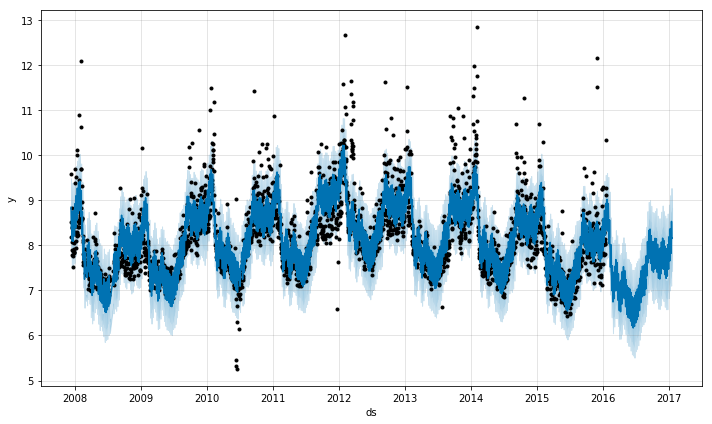

In [12]:
fig1 = m.plot(f)

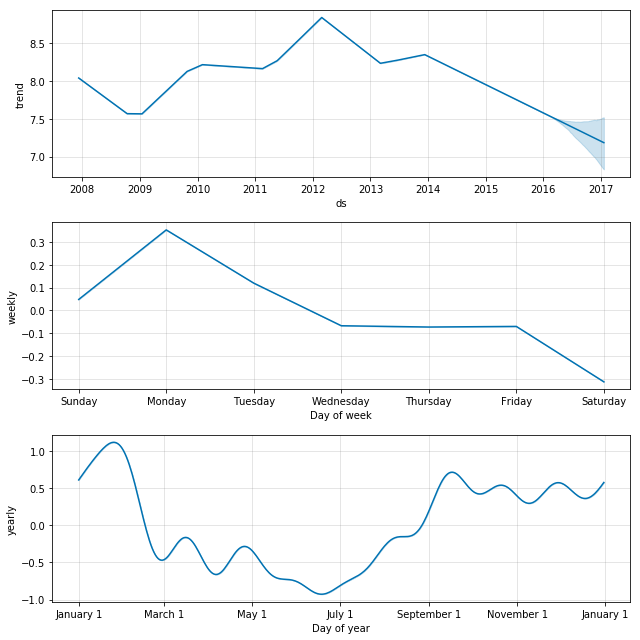

In [14]:
fig2 = m.plot_components(f) # 각 구성요소로 그래프 그림